# Make histogramms for TQV

- author Sylvie Dagoret-Campagne
- date October 18th 2018

In [1]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline


Bad key "axes.color_cycle" on line 215 in
templates/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [3]:
import datetime as dt

In [4]:
YEARSTR="2018"
YEARNUM=int(YEARSTR)

In [5]:
yearfile='MERRA2_'+YEARSTR+'_inst1_2d_asm_Nx_M2I1NXASM_ohp_AllYear.csv'

In [6]:
df_year=pd.read_csv(yearfile)

In [7]:
df_year.head()

,time,PS,T10M,T2M,TO3,TOX,TQI,TQL,TQV,TS,U10M,U2M,U50M,V10M,V2M,V50M
0,2018-01-01 00:00:00,93586.179688,279.042542,277.924255,306.891296,0.006579,0.002162,0.319946,16.039366,277.089447,1.527891,0.762904,2.875433,-1.997757,-0.959274,-3.679868
1,2018-01-01 01:00:00,93644.218750,278.965088,278.596436,308.947205,0.006623,0.002974,0.182983,15.441454,277.915039,4.309712,2.856233,6.262999,-4.501500,-2.982562,-6.735511
2,2018-01-01 02:00:00,93752.140625,277.812256,277.561188,311.975006,0.006688,0.018402,0.112579,13.318526,276.945557,4.463665,3.018662,5.803768,-6.118572,-4.138448,-8.414824
3,2018-01-01 03:00:00,93814.812500,277.139404,276.858215,315.935669,0.006773,0.024605,0.066193,11.264016,276.241669,3.333664,2.247162,4.378160,-6.393670,-4.307884,-8.974257
4,2018-01-01 04:00:00,93837.578125,276.814911,276.422668,322.490082,0.006913,0.004604,0.045456,9.346043,275.632324,2.848288,1.887254,3.963684,-5.576814,-3.692428,-8.323152


## Per year

In [8]:
df_year.describe()

,PS,T10M,T2M,TO3,TOX,TQI,TQL,TQV,TS,U10M,U2M,U50M,V10M,V2M,V50M
count,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000
mean,93605.010626,286.482574,286.156667,345.078004,0.007404,0.021813,0.060989,17.708672,286.245535,0.021388,0.060915,-0.140465,-0.608788,-0.342864,-0.981685
std,642.563931,8.756767,9.196822,38.505628,0.000826,0.041721,0.078547,8.039066,10.482519,3.024915,2.052015,4.064382,3.049534,2.088572,4.108916
min,91121.617188,266.681335,266.794922,260.325714,0.005581,0.000000,0.000000,2.350126,266.385925,-13.590304,-9.430898,-16.700460,-11.513482,-8.019993,-14.637464
25%,93300.148438,279.055763,278.585747,315.535461,0.006771,0.000093,0.002346,11.400371,278.140938,-1.552075,-0.858643,-2.266323,-2.273400,-1.280303,-3.459140
50%,93729.882812,286.627243,285.894913,333.168030,0.007149,0.003481,0.026630,17.012116,285.614929,0.371513,0.218719,0.418060,-0.537979,-0.322029,-0.767486
75%,94017.107422,293.265198,293.074280,369.230484,0.007920,0.024576,0.091034,24.237048,293.532425,1.971984,1.251754,2.708717,1.319634,0.831863,1.857141
max,95630.148438,307.667267,309.370941,476.769897,0.010235,0.507080,0.454712,41.252686,315.242340,10.241591,6.991255,13.905725,11.095821,7.683163,13.775771


In [9]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,PS,T10M,T2M,TO3,TOX,TQI,TQL,TQV,TS,U10M,U2M,U50M,V10M,V2M,V50M
0.05,92302.062500,273.110608,271.944415,300.570044,0.006450,0.000000,0.000000,5.619297,270.505684,-5.613892,-3.875367,-8.013594,-6.176801,-4.274966,-8.279870
0.10,92726.689063,275.120847,274.126968,306.248471,0.006568,0.000000,0.000039,7.057070,272.605145,-3.382963,-2.225191,-5.243864,-4.598542,-3.170159,-6.778754
0.50,93729.882812,286.627243,285.894913,333.168030,0.007149,0.003481,0.026630,17.012116,285.614929,0.371513,0.218719,0.418060,-0.537979,-0.322029,-0.767486
0.90,94195.792188,298.313348,298.947134,402.105991,0.008627,0.067557,0.181384,28.010021,301.164572,3.421493,2.469278,4.260659,3.108744,2.218974,4.063940
0.95,94403.677344,300.995758,301.934918,421.593069,0.009042,0.104558,0.237729,30.763211,305.357976,4.236855,3.011753,5.114908,4.205025,2.984312,5.398069


In [10]:
h2o_year=df_year["TQV"]

In [11]:
h2o_year.replace(to_replace=0, value=np.nan)

0       16.039366
1       15.441454
2       13.318526
3       11.264016
4        9.346043
5        8.057005
6        7.431995
7        7.019148
8        6.777950
9        6.968413
10       7.186449
11       8.139877
12       9.386897
13       9.856486
14       9.833190
15      10.351753
16      11.825985
17      13.097839
18      12.540966
19      12.089822
20      11.838255
21      10.938714
22       7.679219
23       6.444076
24       6.047971
25       6.060508
26       6.144773
27       6.073055
28       6.171664
29       6.289985
          ...    
5802    11.185253
5803    11.215884
5804    12.090873
5805    13.348847
5806    14.259116
5807    14.606684
5808    14.746676
5809    15.265630
5810    17.214325
5811    19.979515
5812    21.479479
5813    22.675085
5814    23.058470
5815    22.207804
5816    20.935621
5817    20.078018
5818    19.453678
5819    19.008728
5820    19.040165
5821    19.259678
5822    19.244413
5823    19.182283
5824    18.362497
5825    17.073181
5826    16

In [12]:
np.mean(h2o_year)

17.70867209252952

In [13]:
mean_h2o_y = np.mean(h2o_year)
variance_h2o_y = np.var(h2o_year)
sigma_h2o_y = np.sqrt(variance_h2o_y)

In [14]:
mean_h2o_y=np.trunc(mean_h2o_y*1000)/1000
sigma_h2o_y=np.trunc(sigma_h2o_y*1000)/1000

In [15]:
print mean_h2o_y 
print variance_h2o_y 
print sigma_h2o_y 

17.708
64.6154956193
8.038


In [16]:
title = "Yearly variation of PWV (year {}), mean = {} std = {}".format(YEARSTR,mean_h2o_y ,sigma_h2o_y)

/Users/dagoret/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


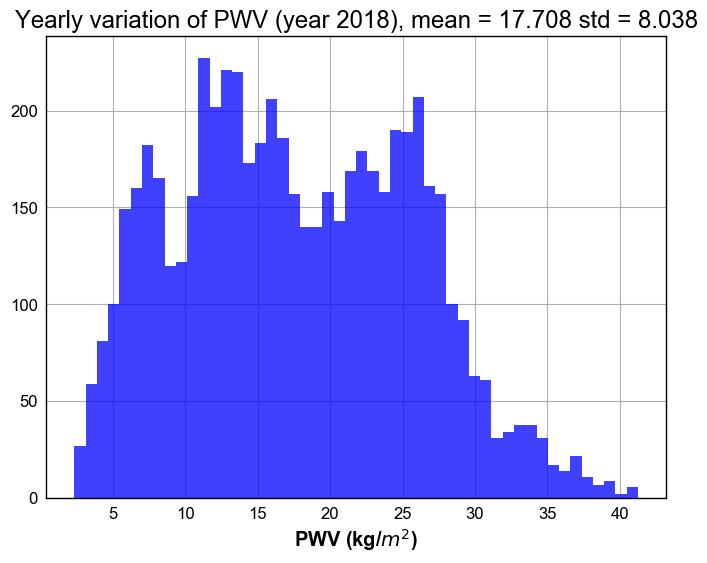

In [17]:
n, bins, patches = plt.hist(h2o_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('PWV (kg/$m^2$)')
figfilename='Histo_PWV_'+YEARSTR+'_allyear.png'
plt.savefig(figfilename)

# Selection of a period

In [18]:
all_datetime=pd.to_datetime(df_year['time'].get_values())

In [19]:
all_datetime

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-08-31 14:00:00', '2018-08-31 15:00:00',
               '2018-08-31 16:00:00', '2018-08-31 17:00:00',
               '2018-08-31 18:00:00', '2018-08-31 19:00:00',
               '2018-08-31 20:00:00', '2018-08-31 21:00:00',
               '2018-08-31 22:00:00', '2018-08-31 23:00:00'],
              dtype='datetime64[ns]', length=5832, freq=None)

In [20]:
winter_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,1,1),all_datetime<dt.datetime(YEARNUM,3,31)))

In [21]:
summer_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,6,1),all_datetime<dt.datetime(YEARNUM,8,31)))

In [22]:
pwv_winter=h2o_year.get_values()[winter_time_index]
pwv_summer=h2o_year.get_values()[summer_time_index]

In [23]:
mean_pwv_winter = np.mean(pwv_winter)
variance_pwv_winter = np.var(pwv_winter)
sigma_pwv_winter = np.std(pwv_winter)

In [24]:
mean_pwv_summer = np.mean(pwv_summer)
variance_pwv_summer = np.var(pwv_summer)
sigma_pwv_summer = np.std(pwv_summer)

In [25]:
mw=np.trunc(mean_pwv_winter*10)/10
sw=np.trunc(sigma_pwv_winter*10)/10

ms=np.trunc(mean_pwv_summer*10)/10
ss=np.trunc(sigma_pwv_summer*10)/10

In [26]:
title = "Yearly variation of PWV(mm) (year {}), summer : {} +/- {}, winter : {} +/- {}".format(YEARSTR,ms,ss,mw,sw)

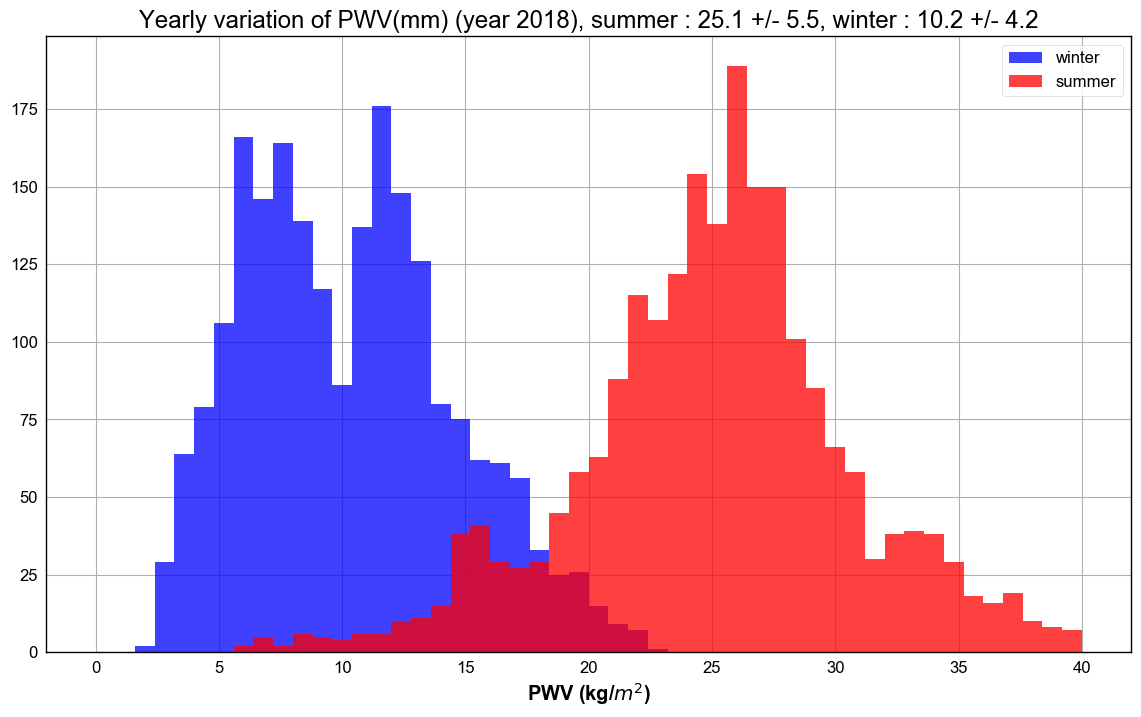

In [27]:
plt.figure(figsize=(14,8))
n, bins, patches = plt.hist(pwv_winter, 50, range=(0,40),normed=False, facecolor='blue', alpha=0.75,label='winter')
n, bins, patches = plt.hist(pwv_summer, 50, range=(0,40),normed=False, facecolor='red', alpha=0.75,label='summer')
plt.title(title)
plt.xlabel('PWV (kg/$m^2$)')
figfilename='Histo_PWV_'+YEARSTR+'_WinterSummer.png'
plt.legend()
plt.savefig(figfilename)